# Heart Failure Prediction Dataset Test

This notebook tests the download and loading of the Heart Failure Prediction dataset from Kaggle.

In [1]:
# Install required packages
%pip install kagglehub pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import shutil

# Download the dataset to current directory
print("Downloading Heart Failure Prediction dataset...")
cache_path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")

# Copy to current folder
current_dir = os.getcwd()
local_data_dir = current_dir
os.makedirs(local_data_dir, exist_ok=True)

# Copy files from cache to local directory
for file in os.listdir(cache_path):
    src = os.path.join(cache_path, file)
    dst = os.path.join(local_data_dir, file)
    shutil.copy2(src, dst)
    print(f"Copied {file} to local data folder")

path = local_data_dir
print(f"Dataset available locally at: {path}")

/home/tamim/ai4ph/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Copied heart.csv to local data folder
Dataset available locally at: /home/tamim/ai4ph/data/heart_failure_prediction


In [3]:
# Check dataset size
total_size = 0
files = os.listdir(path)
for file in files:
    file_path = os.path.join(path, file)
    size = os.path.getsize(file_path)
    total_size += size
    print(f"- {file}: {size/1024:.1f} KB")

print(f"\nTotal dataset size: {total_size/(1024*1024):.2f} MB")

- heart.csv: 35.1 KB
- README.md: 1.0 KB
- dataset_download.ipynb: 258.4 KB

Total dataset size: 0.29 MB


In [4]:
# Load and explore the data
csv_files = [f for f in files if f.endswith('.csv')]
if csv_files:
    df = pd.read_csv(os.path.join(path, csv_files[0]))
    
    print(f"Dataset shape: {df.shape}")
    print(f"\nColumns: {list(df.columns)}")
    print(f"\nData types:\n{df.dtypes}")
    print(f"\nFirst 5 rows:\n{df.head()}")
    
    # Check target variable
    target_col = 'HeartDisease' if 'HeartDisease' in df.columns else df.columns[-1]
    print(f"\nTarget variable '{target_col}' distribution:")
    print(df[target_col].value_counts())
    
    # Check for missing values
    missing = df.isnull().sum()
    if missing.sum() > 0:
        print(f"\nMissing values:\n{missing[missing > 0]}")
    else:
        print("\n✅ No missing values found")
    
    # Basic statistics
    print(f"\nBasic statistics:\n{df.describe()}")

Dataset shape: (918, 12)

Columns: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

Data types:
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

First 5 rows:
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195     

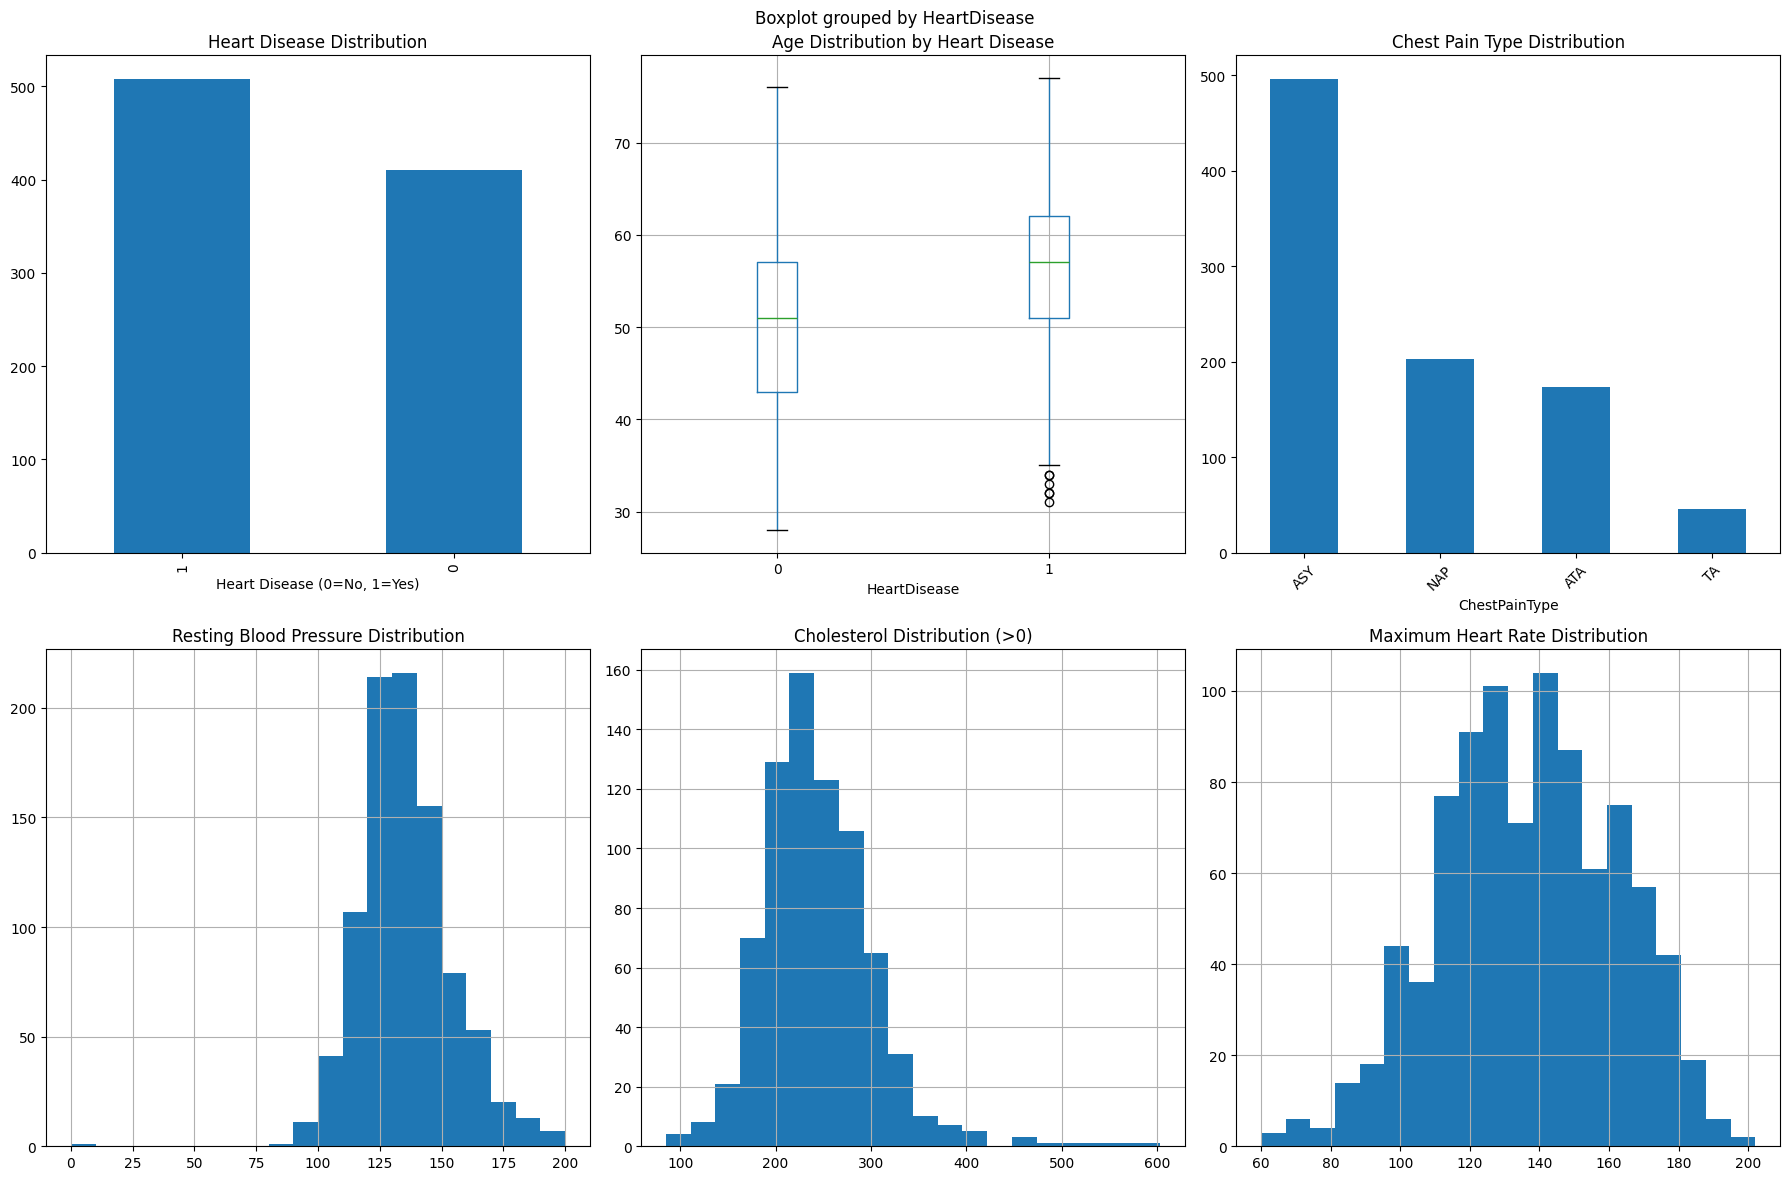

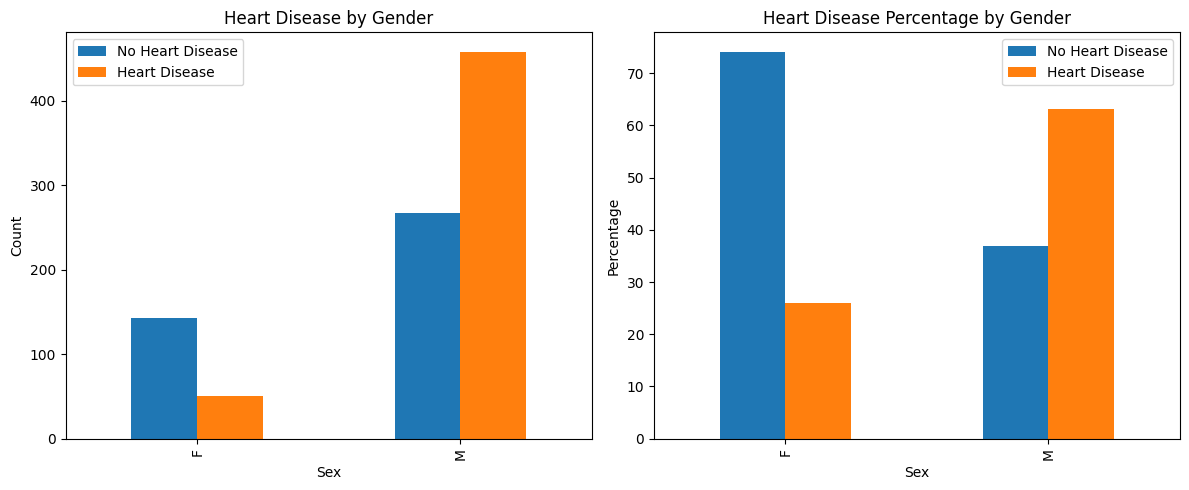

In [5]:
# Create comprehensive medical visualizations
if csv_files and len(df) > 0:
    target_col = 'HeartDisease' if 'HeartDisease' in df.columns else df.columns[-1]
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.ravel()
    
    # Target distribution
    df[target_col].value_counts().plot(kind='bar', ax=axes[0])
    axes[0].set_title('Heart Disease Distribution')
    axes[0].set_xlabel('Heart Disease (0=No, 1=Yes)')
    
    # Age distribution by heart disease
    if 'Age' in df.columns:
        df.boxplot(column='Age', by=target_col, ax=axes[1])
        axes[1].set_title('Age Distribution by Heart Disease')
    
    # Chest pain type distribution
    if 'ChestPainType' in df.columns:
        df['ChestPainType'].value_counts().plot(kind='bar', ax=axes[2])
        axes[2].set_title('Chest Pain Type Distribution')
        axes[2].tick_params(axis='x', rotation=45)
    
    # Resting blood pressure
    if 'RestingBP' in df.columns:
        df['RestingBP'].hist(bins=20, ax=axes[3])
        axes[3].set_title('Resting Blood Pressure Distribution')
    
    # Cholesterol levels
    if 'Cholesterol' in df.columns:
        # Remove zero values which might be missing data
        chol_data = df[df['Cholesterol'] > 0]['Cholesterol']
        chol_data.hist(bins=20, ax=axes[4])
        axes[4].set_title('Cholesterol Distribution (>0)')
    
    # Max heart rate
    if 'MaxHR' in df.columns:
        df['MaxHR'].hist(bins=20, ax=axes[5])
        axes[5].set_title('Maximum Heart Rate Distribution')
    
    plt.tight_layout()
    plt.show()
    
    # Gender and heart disease analysis
    if 'Sex' in df.columns:
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        sex_disease = pd.crosstab(df['Sex'], df[target_col])
        sex_disease.plot(kind='bar', ax=plt.gca())
        plt.title('Heart Disease by Gender')
        plt.xlabel('Sex')
        plt.ylabel('Count')
        plt.legend(['No Heart Disease', 'Heart Disease'])
        
        plt.subplot(1, 2, 2)
        sex_disease_pct = pd.crosstab(df['Sex'], df[target_col], normalize='index') * 100
        sex_disease_pct.plot(kind='bar', ax=plt.gca())
        plt.title('Heart Disease Percentage by Gender')
        plt.xlabel('Sex')
        plt.ylabel('Percentage')
        plt.legend(['No Heart Disease', 'Heart Disease'])
        
        plt.tight_layout()
        plt.show()

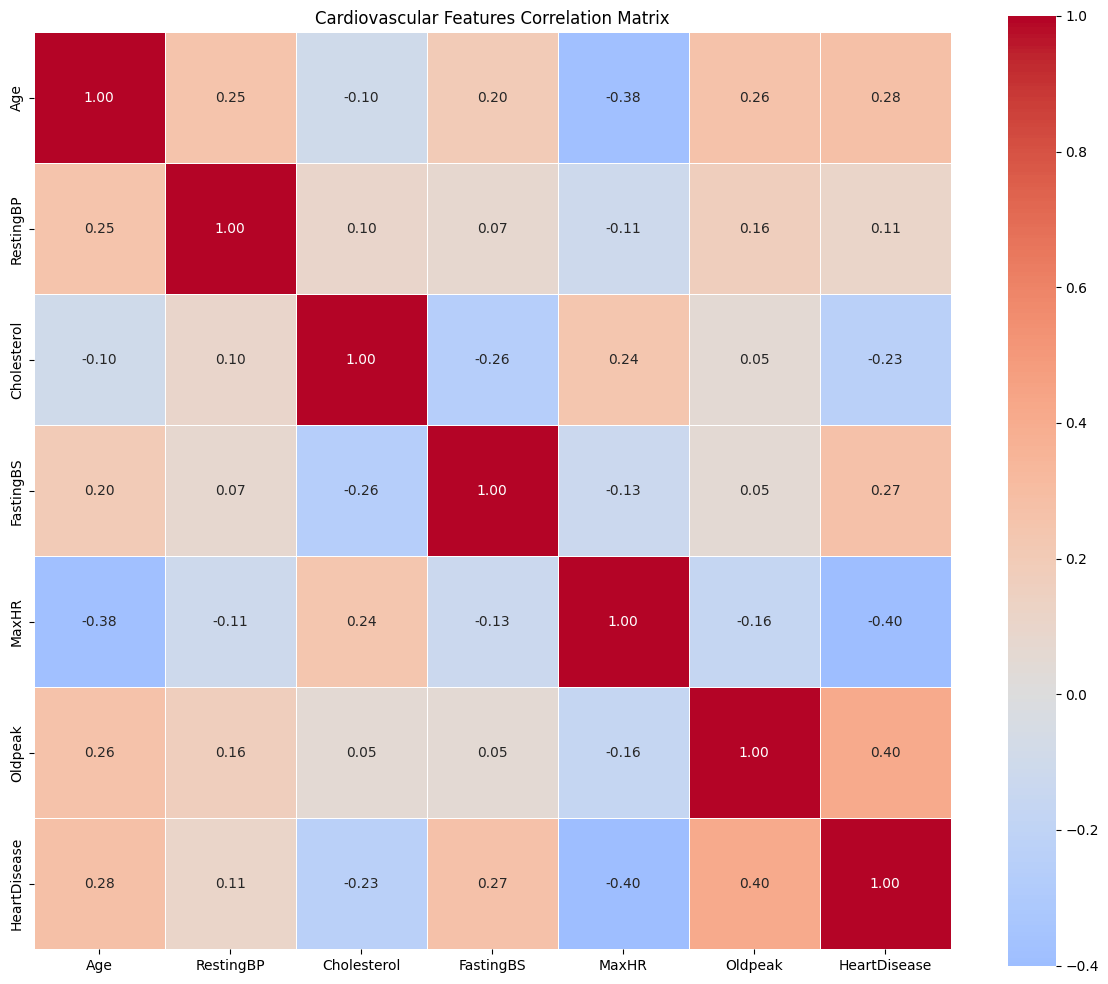


Strongest correlations with HeartDisease:
HeartDisease    1.000000
Oldpeak         0.403951
MaxHR           0.400421
Age             0.282039
FastingBS       0.267291
Cholesterol     0.232741
RestingBP       0.107589
Name: HeartDisease, dtype: float64


In [6]:
# Feature correlation analysis
if csv_files and len(df) > 0:
    plt.figure(figsize=(12, 10))
    
    # Create correlation matrix for numeric features
    numeric_df = df.select_dtypes(include=['int64', 'float64'])
    correlation_matrix = numeric_df.corr()
    
    # Create heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                fmt='.2f', square=True, linewidths=0.5)
    plt.title('Cardiovascular Features Correlation Matrix')
    plt.tight_layout()
    plt.show()
    
    # Show strongest correlations with target
    target_col = 'HeartDisease' if 'HeartDisease' in df.columns else df.columns[-1]
    if target_col in correlation_matrix.columns:
        target_corr = correlation_matrix[target_col].abs().sort_values(ascending=False)
        print(f"\nStrongest correlations with {target_col}:")
        print(target_corr.head(10))

In [7]:
# Clinical insights
if csv_files and len(df) > 0:
    target_col = 'HeartDisease' if 'HeartDisease' in df.columns else df.columns[-1]
    
    print("\nClinical Analysis:")
    print(f"- Total patients: {len(df):,}")
    print(f"- Heart disease cases: {df[target_col].sum():,} ({df[target_col].mean()*100:.1f}%)")
    print(f"- Healthy cases: {len(df) - df[target_col].sum():,} ({(1-df[target_col].mean())*100:.1f}%)")
    
    # Age analysis
    if 'Age' in df.columns:
        age_stats = df.groupby(target_col)['Age'].agg(['mean', 'std', 'min', 'max'])
        print(f"\nAge analysis by heart disease status:")
        print(age_stats)
    
    # Risk factors analysis
    categorical_features = df.select_dtypes(include=['object']).columns
    if len(categorical_features) > 0:
        print(f"\nRisk factors analysis:")
        for feature in categorical_features[:3]:
            if feature != target_col:
                cross_tab = pd.crosstab(df[feature], df[target_col], normalize='index') * 100
                print(f"\n{feature} - Heart Disease Rate:")
                if 1 in cross_tab.columns:
                    print(cross_tab[1].sort_values(ascending=False))


Clinical Analysis:
- Total patients: 918
- Heart disease cases: 508 (55.3%)
- Healthy cases: 410 (44.7%)

Age analysis by heart disease status:
                   mean       std  min  max
HeartDisease                               
0             50.551220  9.444915   28   76
1             55.899606  8.727056   31   77

Risk factors analysis:

Sex - Heart Disease Rate:
Sex
M    63.172414
F    25.906736
Name: 1, dtype: float64

ChestPainType - Heart Disease Rate:
ChestPainType
ASY    79.032258
TA     43.478261
NAP    35.467980
ATA    13.872832
Name: 1, dtype: float64

RestingECG - Heart Disease Rate:
RestingECG
ST        65.730337
LVH       56.382979
Normal    51.630435
Name: 1, dtype: float64


In [8]:
print("✅ Dataset download and analysis completed successfully!")
print("\nDataset Summary:")
print(f"- Location: {path}")
print(f"- Size: {total_size/(1024*1024):.2f} MB (Small & manageable!)")
if csv_files:
    print(f"- Patients: {df.shape[0]:,}")
    print(f"- Clinical features: {df.shape[1]}")
print("- Use case: Heart failure prediction, cardiovascular risk assessment")
print("- Perfect for: Module 5 (Machine Learning), clinical decision support systems")
print("- Features: 11 clinical features including chest pain type, cholesterol, ECG results")

✅ Dataset download and analysis completed successfully!

Dataset Summary:
- Location: /home/tamim/ai4ph/data/heart_failure_prediction
- Size: 0.29 MB (Small & manageable!)
- Patients: 918
- Clinical features: 12
- Use case: Heart failure prediction, cardiovascular risk assessment
- Perfect for: Module 5 (Machine Learning), clinical decision support systems
- Features: 11 clinical features including chest pain type, cholesterol, ECG results
